Based on Object detection and Classification Kaggle notebook using natural-images dataset by navidrashik.

This notebook generates a reference for use on our test dataset

-TODO: #MAKE A TEST DATAGEN linking to separate path

#https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

#TODO DELETE BOTH AIRPLANE AND PERSON

In [1]:


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
#set randomness for reproducibility
from numpy.random import seed
seed(8) #1
from tensorflow import set_random_seed
set_random_seed(8) #2

#

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


#TRAINING SETS########################################

#Download the training dataset- REFERENCE

#!gdown https://drive.google.com/uc?id=1yYHVSKhMaUM19LuGHo07Hor8Xujxk2uD



#Download the training dataset -STLYLED 20%

!gdown https://drive.google.com/uc?id=1lXWngntuZf3xgJK0cetlbP5i8XgaOwXf




  
#Download the training dataset -Blizzard 20%

#!gdown https://drive.google.com/uc?id=1bN68zyY4Aq5hFXDKPAifN-UOGW3Vuzah

#TEST SETS

#Download the test dataset- blizzard
 
#!gdown https://drive.google.com/uc?id=1I-EzDmkYwnnN189W09PX47Sj4d6TuLjj

  
#Download test dataset- snow landscapes
!gdown https://drive.google.com/uc?id=1neRC_tnPFN9-u9hr6LSretJhaVoW1VQ_


#Download test dataset- styled
#!gdown https://drive.google.com/uc?id=17IMXL-nQTDg3sOQbyL7s6Z-CtjRrvlLg
  
  


#Unzip all folders

!unzip natural_images_styled.zip
!unzip snow.zip


Downloading...
From: https://drive.google.com/uc?id=1lXWngntuZf3xgJK0cetlbP5i8XgaOwXf
To: /content/natural_images_styled.zip
89.4MB [00:01, 73.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1neRC_tnPFN9-u9hr6LSretJhaVoW1VQ_
To: /content/snow.zip
27.1MB [00:02, 9.97MB/s]
Archive:  natural_images_styled.zip
   creating: natural_images_styled/
   creating: natural_images_styled/car/
  inflating: natural_images_styled/car/car_0010.jpg  
  inflating: natural_images_styled/car/car_0011.jpg  
  inflating: natural_images_styled/car/car_0012.jpg  
  inflating: natural_images_styled/car/car_0013.jpg  
  inflating: natural_images_styled/car/car_0014.jpg  
  inflating: natural_images_styled/car/car_0015.jpg  
  inflating: natural_images_styled/car/car_0016.jpg  
  inflating: natural_images_styled/car/car_0017.jpg  
  inflating: natural_images_styled/car/car_0018.jpg  
  inflating: natural_images_styled/car/car_0019.jpg  
  inflating: natural_images_styled/car/car_0020.jpg  
  inflating

In [2]:
print(os.listdir("/content/"))

#Print and remove zips once done

!rm snow.zip
!rm natural_images_styled.zip


['.config', 'natural_images_styled.zip', 'snow.zip', 'natural_images_styled', 'snow', 'sample_data']


In [3]:
from os import listdir
data_list = listdir('/content/natural_images_styled/')

#Delete some classes that may interfere

!cd natural_images_styled
#!rm -r natural_images_styled/flower
#!rm -r natural_images/motorbike
#!rm -r natural_images/airplane

data_list

['fruit', 'dog', 'car', 'flower', 'cat']

Resnet Initialization

In [4]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model ,load_model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import tensorflow as tf


DATASET_PATH  = '/content/natural_images_styled'
test_dir = 'snow/'
IMAGE_SIZE    = (299, 299)
NUM_CLASSES   = len(data_list)
BATCH_SIZE    = 20  # try reducing batch size or freeze more layers if your GPU runs out of memory
FREEZE_LAYERS = 25  # freeze the first this many layers for training
NUM_EPOCHS    = 10
LEARNING_RATE = 5e-5 #Slow learn rate as we are transfer training
DROP_OUT = .5



#Train datagen here is a preprocessor
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=50,
                                   featurewise_center = True,
                                   featurewise_std_normalization = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.25,
                                   zoom_range=0.1,
                                   zca_whitening = True,
                                   channel_shift_range = 20,
                                   horizontal_flip = True ,
                                   vertical_flip = True ,
                                   validation_split = 0.2,
                                   fill_mode='constant')

# test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
#                                    fill_mode='constant')

train_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "training"
                                                  )

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "validation"
                                                 
                                                  )

#MAKE A TEST DATAGEN linking to separate path
#train_batches

#https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:339: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 2000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


Layer Modification at upper layer of Resnet

In [5]:
# build our classifier model based on pre-trained InceptionResNetV2:
# 1. we don't include the top (fully connected) layers of InceptionResNetV2
# 2. we add a DropOut layer followed by a Dense (fully connected)
#    layer which generates softmax class score for each class
# 3. we compile the final model using an Adam optimizer, with a
#    low learning rate (since we are 'fine-tuning')

#############main portion for InceptionResnetV2 only##############
net = InceptionResNetV2(include_top=True,
                        weights='imagenet',
                        input_tensor=None,
                        input_shape=(299,299,3))

  ############## Run this block if include top = False ######
#   x = net.output
#   x = Flatten()(x)
#   x = Dropout(DROP_OUT)(x)
###############   End of block ##################

############## Run this block if include top = True ######
'''This block keeps avg_pool (GlobalAveragePooling2) layer and removes only prediction layer.
Then replace inceptionResnetv2's predictionlayer with a drpout layer and and a softmax layer. 
To change the class class size of 1000 to 8 we need to replace their pediction layer with our softmax layer.
'''
avg_pool = net.layers[-2]
prediction = net.layers[-1]

#create drpout layer
drp1 = Dropout(DROP_OUT)
x = drp1(avg_pool.output)
###############   End of block ##################



output_layer = Dense(5, activation='softmax', name='softmax')(x)
net_final = Model(inputs=net.input, outputs=output_layer)

for layer in net_final.layers[:FREEZE_LAYERS]:
    layer.trainable = False

for layer in net_final.layers[FREEZE_LAYERS:]:
    layer.trainable = True

net_final.compile(optimizer=Adam(lr=LEARNING_RATE),
                  loss='categorical_crossentropy', metrics=['accuracy'])

#   print(net_final.summary())

Instructions for updating:
Colocations handled automatically by placer.
225214464/225209952 [==============================] - 7s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
print(net_final.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1 (BatchNo (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization_v1[0][0]     
__________________________________________________________________________________________________
conv2d_1 (

In [0]:
#Adding Dropout layer to a pre trained model
drpout_needed = False

if drpout_needed :
  flt = net_final.layers[-2]
  prediction = net_final.layers[-1]

  #create drpout layer
  drp1 = Dropout(DROP_OUT)
  x = drp1(flt.output)

  predictors = prediction(x)
  net_final = Model(inputs=net_final.input, outputs=predictors)

Training

In [8]:
#FIT MODEL
result=net_final.fit_generator(train_batches,
                        steps_per_epoch = np.ceil(len(train_batches) / BATCH_SIZE),
                        validation_data = valid_batches,
                        validation_steps = np.ceil(len(valid_batches) / BATCH_SIZE),
                        epochs = NUM_EPOCHS,
#                         
                       )

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:718: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
100/100 [==============================] - 121s 1s/step - loss: 0.3604 - acc: 0.8880 - val_loss: 0.0575 - val_acc: 0.9800
Epoch 2/10
100/100 [==============================] - 93s 931ms/step - loss: 0.0656 - acc: 0.9800 - val_loss: 0.0356 - val_acc: 0.9920
Epoch 3/10
100/100 [==============================] - 94s 944ms/step - loss: 0.0510 - acc: 0.9875 - val_loss: 0.0270 - val_acc: 0.9920
Epoch 4/10
100/100 [==============================] - 93s 932ms/step - loss: 0.0381 - acc: 0.9915 - val_loss: 0.0075 - val_acc: 0.9980
Epoch 5/10
100/100 [==============================] - 93s 930ms/step - loss: 0.0385 - acc: 0.9885 - val_loss: 0.0240 - val_acc: 0.9880
Epoch 6/10
100/100 [==============================] - 94s 945ms/step - loss: 0.0173 - acc: 0.9945 - val_loss: 0.0302 - val_acc: 0.9860
Epoch 7/10
100/100 [==============================] - 93s 930ms/step - loss: 0.0101 - acc: 0.9975 - val_loss: 0.0134 - val_acc: 0.9960
Epoch 8/10
100/100 [==============================] - 93s

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:718: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


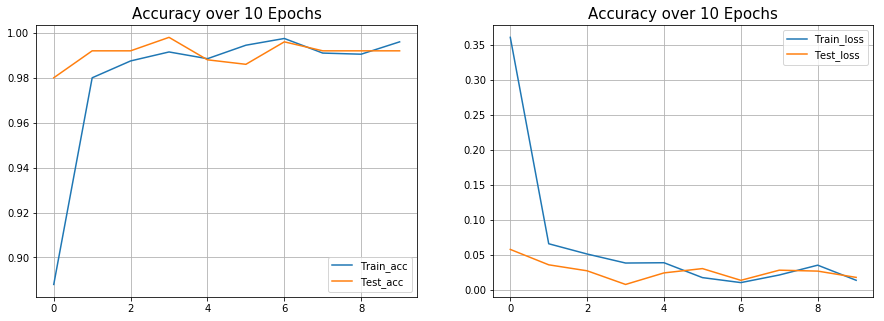

In [9]:
import matplotlib.pyplot as plt


def plot_acc_loss(result, epochs):
    acc = result.history['acc']
    loss = result.history['loss']
    val_acc = result.history['val_acc']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(epochs), acc, label='Train_acc')
    plt.plot(range(epochs), val_acc, label='Test_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(epochs), loss, label='Train_loss')
    plt.plot(range(epochs), val_loss, label='Test_loss')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_acc_loss(result, 10)

In [10]:
# save trained weights
# net_final.save(WEIGHTS_FINAL)
x = net_final.evaluate_generator(valid_batches,
                           steps = np.ceil(len(valid_batches) / BATCH_SIZE),
                           use_multiprocessing = True,
                           verbose = 1
                           )


print('Test loss:' , x[0])
print('Test accuracy:',x[1])

#net_final.save('stylgen_recog_styled_10.h5')

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:718: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


25/25 [==============================] - 12s 462ms/step - loss: 0.0228 - acc: 0.9900
Test loss: 0.02280706227698829
Test accuracy: 0.99


Predict

In [11]:
#Evaluate on test dataset - TODO: actually import the test dataset define TESTdir, we also have to name all of it as CAR


eval_generator = train_datagen.flow_from_directory(
        test_dir,target_size=IMAGE_SIZE,
        batch_size=20,
        class_mode='categorical')
eval_generator.reset()    
pred = net_final.predict_generator(eval_generator,1000,verbose=1)
print("Predictions finished")


#Map the predictions to the training classes
#First, take max prediction class
predicted_class_indices=np.argmax(pred,axis=1)

#Map it to train generataor
labels = (train_batches.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

Found 100 images belonging to 1 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:718: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


5/5 [==============================] - 8s 2s/step
Predictions finished


Save

In [12]:
#Save results

filenames=eval_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("finalresults_styled_snow.csv",index=False)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:718: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:7